In [65]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [66]:
train = pd.read_csv('train.csv')

In [67]:
test = pd.read_csv('test.csv')

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess the data
    
    -Deal with NAs

    -Convert some strings to factors


In [69]:
from plotnine import ggplot, aes, geom_line, geom_histogram

In [70]:
train['Age'].isnull().sum()

177

In [71]:
train = train[train['Age'].notna()]

d:\python\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


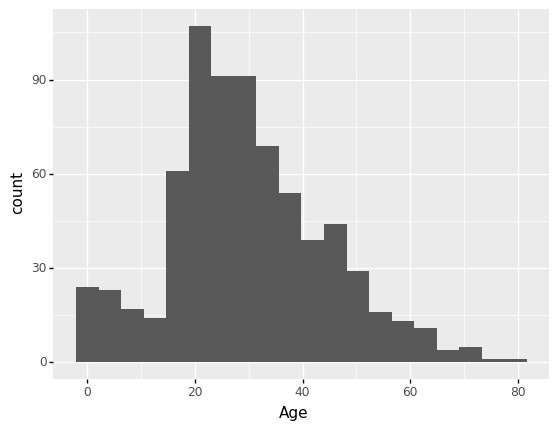

<ggplot: (141514569689)>

In [72]:
(
    ggplot(train) + 
    aes(x = train['Age'])+
    geom_histogram()
)

Age is normally distributed.

# Initial Model: Sex, class, age, fare

In [73]:
# Logistic regression of surival on sex class age fare
# Create dummy variables for sex and class


In [74]:
gender_dummies = pd.get_dummies(train['Sex'])

In [75]:
class_dummies = pd.get_dummies(train['Pclass'])

In [76]:
train = pd.concat([train, gender_dummies, class_dummies], axis = 1)
train = train.drop(['Sex', 'male', 1], axis = 1)

Split the training data into training and validation 

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = ['Age', 'female', 2 , 3, 'Fare']
X = train[X]
Y = train['Survived']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [80]:
model_logit = LogisticRegression().fit(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [81]:
model_logit.score(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.8073555166374781

# Evaluate model on test set

In [82]:
y_pred = model_logit.predict(X_test)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [83]:
y_pred.size

143

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [85]:
accuracy_score(Y_test, y_pred)

0.7552447552447552

In [86]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.68      0.70      0.69        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.76      0.76      0.76       143



# Decision tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
Y_train

328    1
73     0
253    0
719    0
666    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 571, dtype: int64

In [92]:
model_dtree = DecisionTreeRegressor(random_state = 1)

In [93]:
model_dtree.fit(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


DecisionTreeRegressor(random_state=1)